In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datados/data2.csv
/kaggle/input/datados/data3.csv
/kaggle/input/datados/data1.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data1=pd.read_csv('/kaggle/input/datados/data1.csv')
data2=pd.read_csv('/kaggle/input/datados/data2.csv')
data3=pd.read_csv('/kaggle/input/datados/data3.csv')

train_data=pd.concat([data1,data2,data3]).reset_index(drop=True)

train_data = train_data.drop(columns='Unnamed: 0')

train_data["Label"] = train_data["Label"].replace(["Benign","Anomaly"],[0,1])
for label, index in zip(['Benign', 'Anomaly'], [0, 1]):
    print(f"{label}: {index}")

Benign: 0
Anomaly: 1


In [ ]:
print(train_data["Label"].value_counts())

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = train_data.drop("Label", axis=1)
y = train_data["Label"]

undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

print(Counter(y))

Label
0    1567950
1    1000448
Name: count, dtype: int64
Counter({0: 1000448, 1: 1000448})


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', save_best_only=True, monitor='val_loss', mode='min')

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

y_pred_probs = model.predict(X_test)
y_pred_binary = (y_pred_probs > 0.5).astype(int)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_probs)}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)


Epoch 1/100
21885/21885 ━━━━━━━━━━━━━━━━━━━━ 123s 5ms/step - accuracy: 0.9323 - loss: 0.1708 - val_accuracy: 0.9798 - val_loss: 0.0617
Epoch 2/100
21885/21885 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - accuracy: 0.9782 - loss: 0.0662 - val_accuracy: 0.9812 - val_loss: 0.0522
Epoch 3/100
21885/21885 ━━━━━━━━━━━━━━━━━━━━ 122s 6ms/step - accuracy: 0.9812 - loss: 0.0569 - val_accuracy: 0.9831 - val_loss: 0.0487
Epoch 4/100
21885/21885 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - accuracy: 0.9829 - loss: 0.0525 - val_accuracy: 0.9845 - val_loss: 0.0481
Epoch 5/100
21885/21885 ━━━━━━━━━━━━━━━━━━━━ 119s 5ms/step - accuracy: 0.9843 - loss: 0.0488 - val_accuracy: 0.9857 - val_loss: 0.0435
Epoch 6/100
21885/21885 ━━━━━━━━━━━━━━━━━━━━ 121s 6ms/step - accuracy: 0.9854 - loss: 0.0464 - val_accuracy: 0.9871 - val_loss: 0.0407
Epoch 7/100
21885/21885 ━━━━━━━━━━━━━━━━━━━━ 120s 5ms/step - accuracy: 0.9861 - loss: 0.0448 - val_accuracy: 0.9886 - val_loss: 0.0378
Epoch 8/100
21885/21885 ━━━━━━━━━━━━━━━━━━━━ 121s 6ms/s

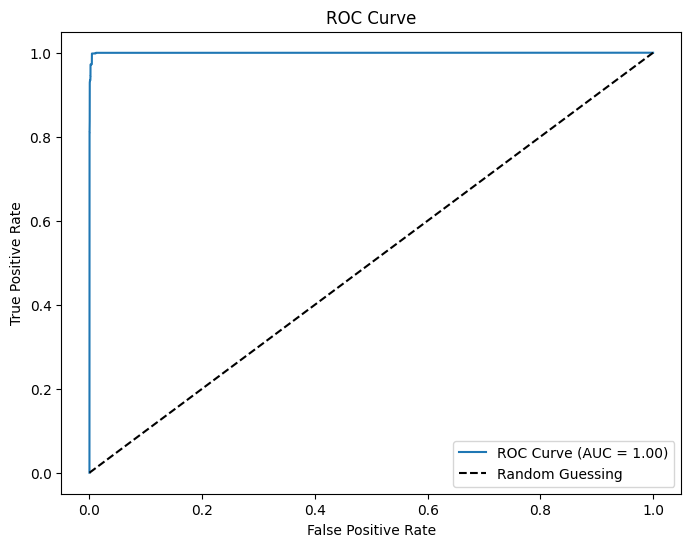

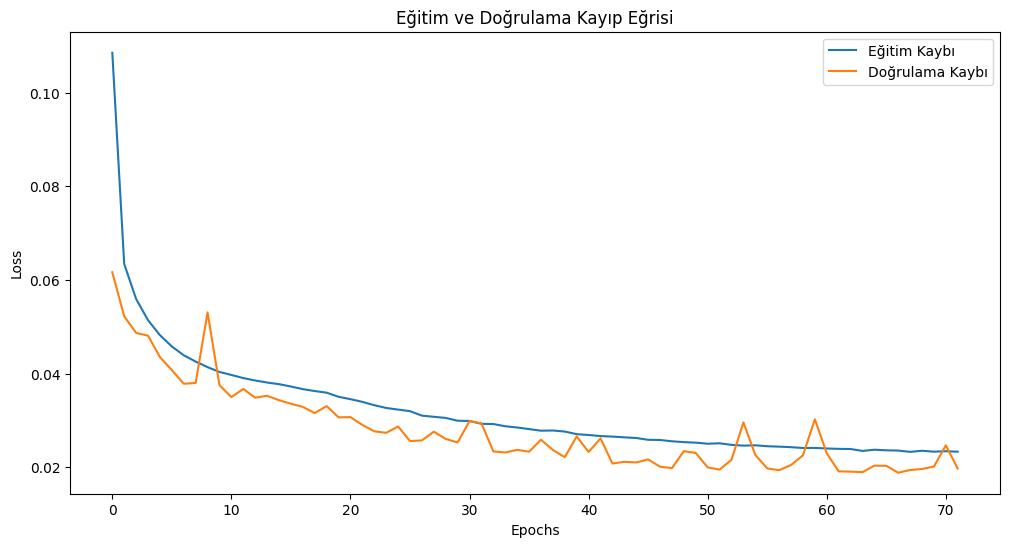

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kayıp Eğrisi')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Gerçek ve Tahmin Edilen Değerler (10 Örnek):
   Gerçek Değerler  Tahmin Edilen Sınıflar  Tahmin Edilen Olasılıklar
0                1                       1               1.000000e+00
1                0                       0               1.438509e-08
2                0                       0               4.832177e-10
3                1                       1               9.999999e-01
4                0                       0               2.179790e-06
5                1                       1               1.000000e+00
6                0                       0               5.241475e-11
7                1                       1               1.000000e+00
8                1                       1               9.999996e-01
9                0                       0               4.758540e-10


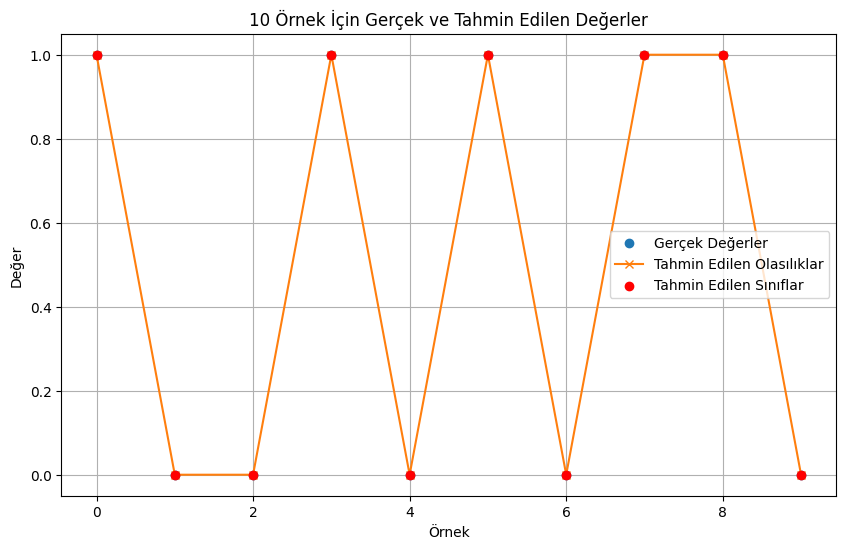

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y_test = np.array(y_test)
X_test = np.array(X_test)

sample_indices = np.random.choice(range(len(y_test)), size=10, replace=False)
y_test_sample = y_test[sample_indices]
X_test_sample = X_test[sample_indices]

y_pred_sample = model.predict(X_test_sample)

y_pred_class = (y_pred_sample >= 0.5).astype(int)

df_results = pd.DataFrame({
    "Gerçek Değerler": y_test_sample.flatten(),
    "Tahmin Edilen Sınıflar": y_pred_class.flatten(),
    "Tahmin Edilen Olasılıklar": y_pred_sample.flatten()
})

print("Gerçek ve Tahmin Edilen Değerler (10 Örnek):")
print(df_results)


plt.figure(figsize=(10, 6))

plt.plot(range(10), y_test_sample, label='Gerçek Değerler', marker='o', linestyle='None')

plt.plot(range(10), y_pred_sample, label='Tahmin Edilen Olasılıklar', marker='x')

plt.scatter(range(10), y_pred_class, color='red', label='Tahmin Edilen Sınıflar', zorder=3)

plt.title("10 Örnek İçin Gerçek ve Tahmin Edilen Değerler")
plt.xlabel("Örnek")
plt.ylabel("Değer")
plt.legend()
plt.grid(True)
plt.show()
